In [1]:
pip install split-folders tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [82]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import splitfolders
import os

Input Folder untuk dibagi menjadi train dan val

In [83]:
base_dir = '/Semester 5/Praktikum/Kecerdasan Buatan/PA/Data foto' # punya wendra
# base_dir = 'C:\FILE SEB INSTALL ULANG 7 6 2021\KULIAH\Semester 5\Kecerdasan Buatan\Praktikum KB\Projek Akhir\dataset' # punya nizar

# Preprocessing

#### Membagi folder Train, Validation, Testing dengan perbandingan 7:1:2

In [84]:
splitfolders.ratio(
    base_dir,
    output='ready_dataset',
    ratio=(.7, 0.1,0.2)
)

Copying files: 1399 files [02:29,  9.38 files/s]


#### Menambahkan ke masing masing folder untuk Training, Validation, dan Testing

In [85]:
train_dir = 'ready_dataset/train'
val_dir = 'ready_dataset/val' 
test_dir = 'ready_dataset/test'

os.listdir(test_dir)

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [86]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
#def to_grayscale_then_rgb(image):
    #original = tf.constant([[[32, 150, 3.0]]])
    #image = tf.image.rgb_to_grayscale(image)
    #return image 

#### Proses Augmentasi Gambar
##### Pada Data Train
- ReScale
- Rotation
- Brightness
- Scaling
- Zoom in / Zoom out
- Horizontal dan Vertical Flip
##### Pada Data Valdiation dan Testing
- ReScale

In [87]:
# augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20, # memutar gambar
                    brightness_range=(0.5,1.0), # value < 1 lebih gelap
                    shear_range=0.2, # untuk mengatur skala image
                    zoom_range=(0.8,1.0), # value < 1 akan zoom in
                    fill_mode='nearest', # untuk mengisi gambar atau wadah yang tidak memiliki nilai
                    #preprocessing_function=to_grayscale_then_rgb,
                    horizontal_flip=True,
                    vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


#### Mengambil direktori untuk di proses augmentasi masing-masing
##### Pada Data Train, Validation, Testing
- nama direktori masing-masing
- target gambar yang diaugmentasi sebesar 150 x 150
- batch size yaitu gambar yang dimasukan kedalam step untuk dimana 1 step yaitu ada 32 gambar yang dimasukkan

In [88]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size=(150,150), # mengubah resolusi seluruh gambar jadi 150*150
    batch_size=32,# untuk menentukan jumlah image yang akan dimasukkan ke dalam steps training
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 977 images belonging to 7 classes.
Found 138 images belonging to 7 classes.
Found 284 images belonging to 7 classes.


#### Membuat Model mulai dari elemen yang kedua

In [89]:
image, label = train_generator.next()

# Visualisasi

#### Menentukan Class untuk Visualisasi Jumlah Data

In [90]:
class_name = ['A','B','C','D','E','F','G']

### Jumlah Keseluruhan Data

#### Pallet warna Visualisasi

In [91]:
palette1 = list(reversed(sns.color_palette("mako", 7).as_hex()))
palette2 = list(reversed(sns.color_palette("viridis", 7).as_hex()))
palette3 = list(reversed(sns.color_palette("cubehelix", 7).as_hex()))
palette4 = list(reversed(sns.color_palette("icefire", 7).as_hex()))

#### Visualisasi Jumlah Data Semuanya, Training, Validation, Testing
##### Jumlah Data Keseluruhan

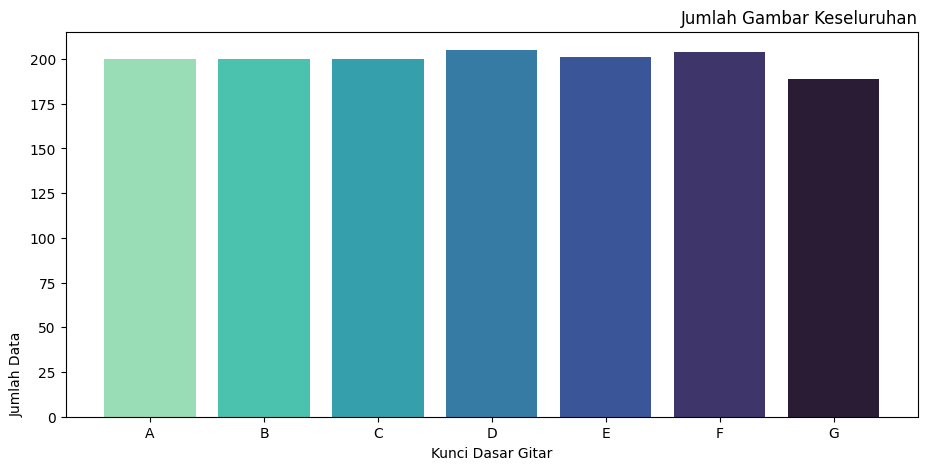

In [92]:
list_jumlah_file_all = []

# loop untuk menyimpan jumlah masing-masing file tiap kelas kedalam list
for kelas in os.listdir(base_dir):
    list_file_kelas = os.listdir(os.path.join(base_dir, kelas)) # [img_343.jpg, img_645.jpg, ...]
    banyaknya_file = len(list_file_kelas)
    list_jumlah_file_all.append(banyaknya_file) # masukkan jumlahnya ke dalam list
    
x = class_name # variabel yang berisi classname
y = list_jumlah_file_all # list dari banyaknya jumlah file keseluruhan yang diambil dari perulangan diatas
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color=palette1)
plt.title('Jumlah Gambar Keseluruhan', loc='right')
plt.xlabel('Kunci Dasar Gitar')
plt.ylabel('Jumlah Data', loc='bottom')
plt.show()

##### Jumlah Data Training

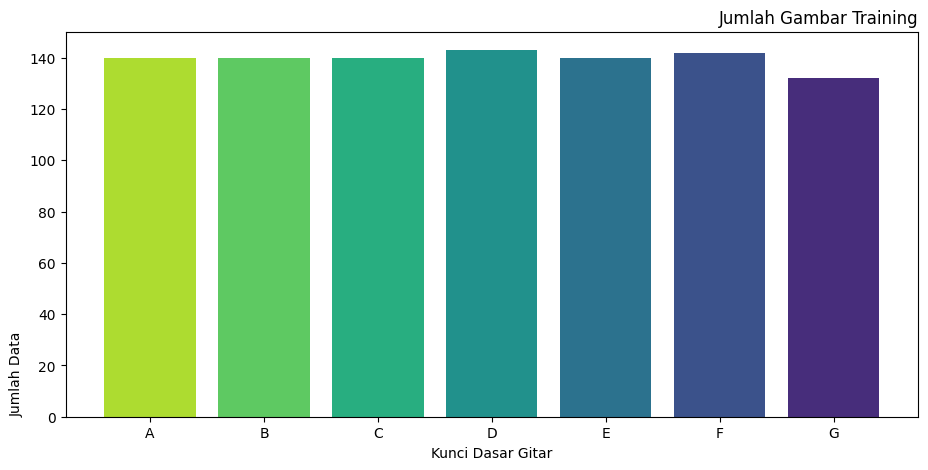

In [93]:
list_jumlah_file_train = []

# loop untuk menyimpan jumlah masing-masing file tiap kelas kedalam list
for kelas in os.listdir(train_dir):
    list_file_kelas = os.listdir(os.path.join(train_dir, kelas)) # [img_343.jpg, img_645.jpg, ...]
    banyaknya_file = len(list_file_kelas)
    list_jumlah_file_train.append(banyaknya_file) # masukkan jumlahnya ke dalam list

x = class_name # variabel yang berisi classname
y = list_jumlah_file_train ## list dari banyaknya jumlah file training yang diambil dari perulangan diatas
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color=palette2)
plt.title('Jumlah Gambar Training', loc='right')
plt.xlabel('Kunci Dasar Gitar')
plt.ylabel('Jumlah Data', loc='bottom')
plt.show()

##### Jumlah Data Validation

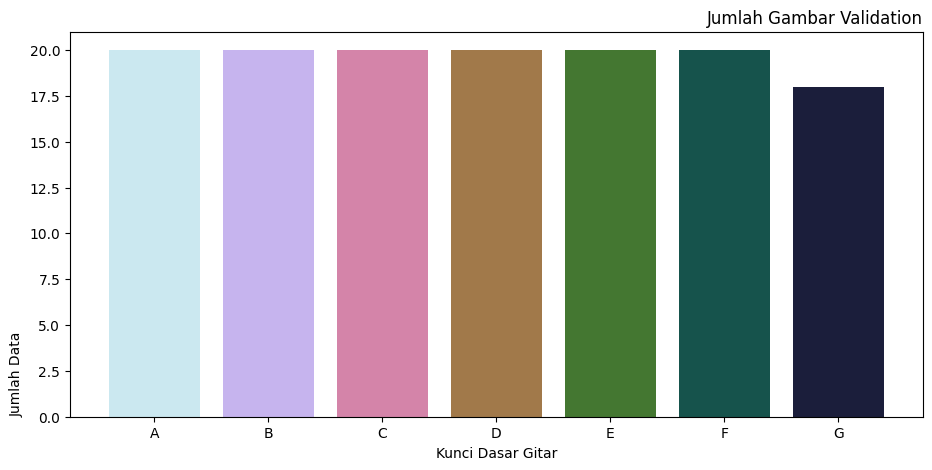

In [94]:
list_jumlah_file_val = []

# loop untuk menyimpan jumlah masing-masing file tiap kelas kedalam list
for kelas1 in os.listdir(val_dir):
    list_file_kelas1 = os.listdir(os.path.join(val_dir, kelas1)) # [img_343.jpg, img_645.jpg, ...]
    banyaknya_file1 = len(list_file_kelas1)
    list_jumlah_file_val.append(banyaknya_file1) # masukkan jumlahnya ke dalam list

x = class_name # variabel yang berisi classname
y = list_jumlah_file_val # list dari banyaknya jumlah file validation yang diambil dari perulangan diatas
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color=palette3)
plt.title('Jumlah Gambar Validation', loc='right')
plt.xlabel('Kunci Dasar Gitar')
plt.ylabel('Jumlah Data', loc='bottom')
plt.show()

#### Jumlah Data Testing

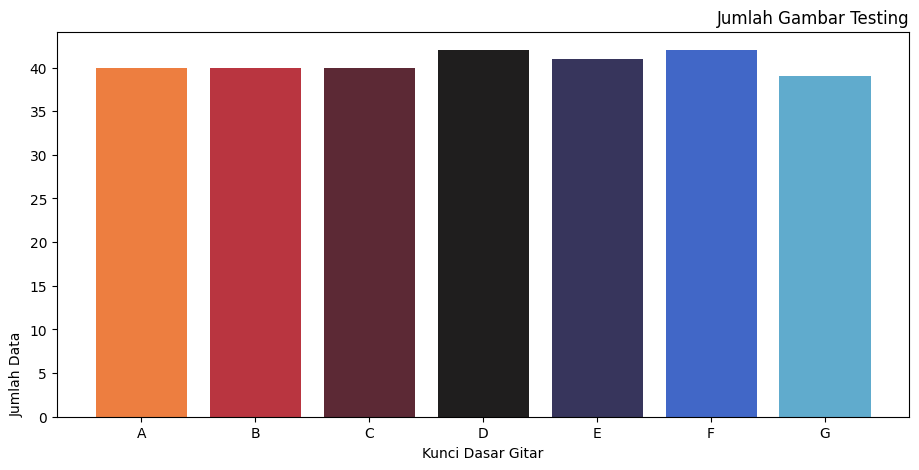

In [95]:
list_jumlah_file_test = []

# loop untuk menyimpan jumlah masing-masing file tiap kelas kedalam list
for kelas1 in os.listdir(test_dir):
    list_file_kelas2 = os.listdir(os.path.join(test_dir, kelas1)) # [img_343.jpg, img_645.jpg, ...]
    banyaknya_file2 = len(list_file_kelas2)
    list_jumlah_file_test.append(banyaknya_file2) # masukkan jumlahnya ke dalam list

x = class_name # variabel yang berisi classname
y = list_jumlah_file_test # list dari banyaknya jumlah file testing yang diambil dari perulangan diatas
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color=palette4)
plt.title('Jumlah Gambar Testing', loc='right')
plt.xlabel('Kunci Dasar Gitar')
plt.ylabel('Jumlah Data', loc='bottom')
plt.show()

In [96]:
len(image)

32

In [97]:
label

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
 

#### Visualisasi Gambar Berdasarkan Nama Labelnya
- dari semua kelasdibuat sub plot 
- yang berbentuk matriks 3x3
- tidak menggunakan pengukuran(axis)

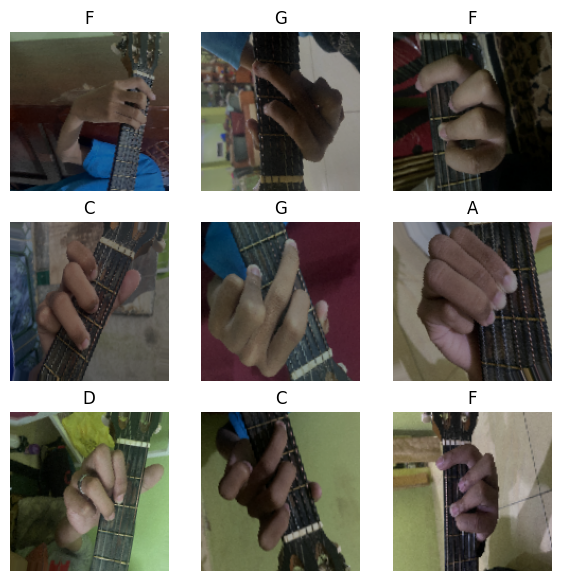

In [98]:
plt.figure(figsize=(7,7))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[i])
  plt.title(class_name[np.argmax(label[i])])
  plt.axis("off")


#### Visualisasi Gambar dan Menampilkan ukuran dari tiap gambar(shape)

(32, 150, 150, 3)


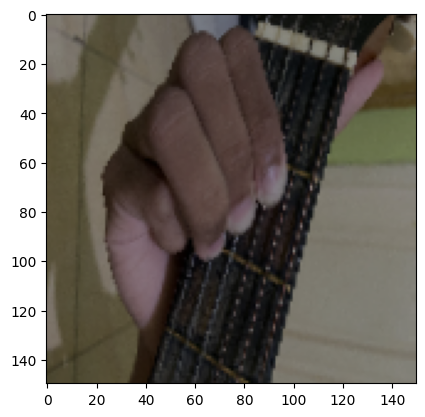

(32, 150, 150, 3)


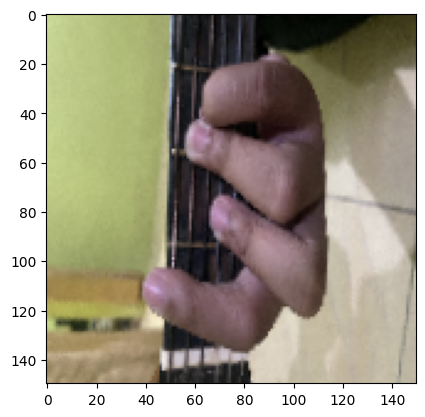

(32, 150, 150, 3)


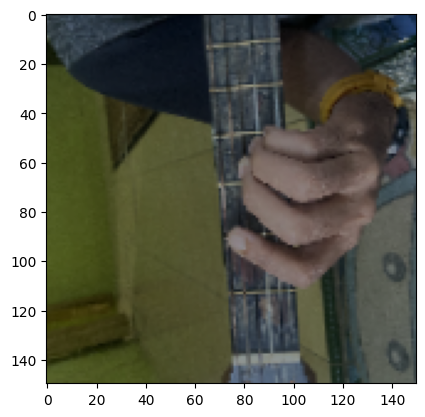

(32, 150, 150, 3)


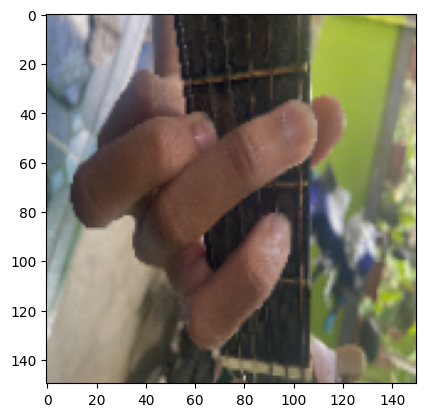

(32, 150, 150, 3)


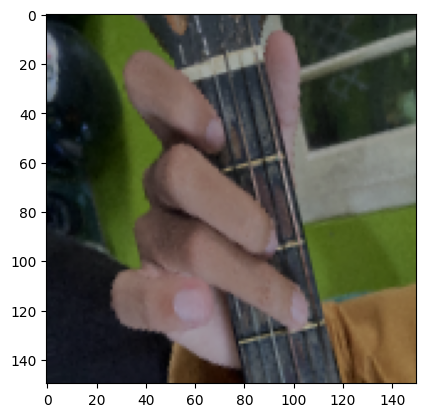

(32, 150, 150, 3)


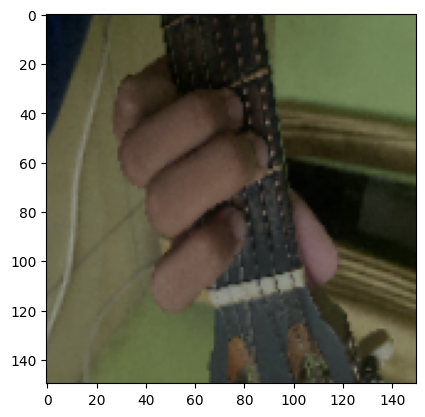

(32, 150, 150, 3)


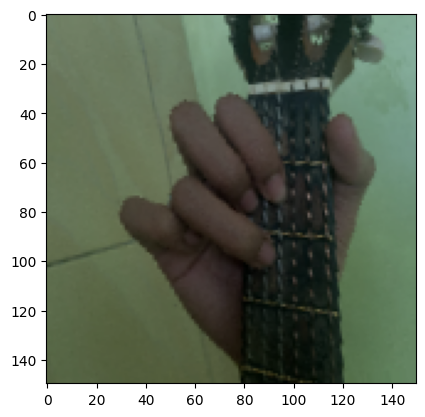

In [99]:
for _ in range(7):
  img, label = train_generator.next() # method mengembalikkan data
  print(img.shape)   #  (32,150,150,3)
  plt.imshow(img[i])
  plt.show()

# Modeling

In [100]:
from tensorflow import keras

#### Modelling dengan berberapa layer
- Pertama Input layer
    - Convolution filter sebanyak 32, input shape sesuai dengan gambar
    - fungsi aktivasi ReLU
- Kedua Hidden Layer
    - Pooling sebanyak 4 dengan matrix 2x2 
    - Convolution filter yang berbeda dari 64 sampai 128 dengan matrix 3x3 dengan Aktivasi ReLu
    - Layer Dropout 0.2 
    - Layer Flatten 
    - Layer Dense sebanyak 128 filter
- Ketiga Output layer
    - Layer dense sebanyak 7 filter dan fungsi aktivasi softmax

In [101]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)), #input layer
    # Hidden Layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), #menyatukan inputan yang memiliki dimensi
    tf.keras.layers.Dense(128, activation='relu'),
    # Hidden Layer
    tf.keras.layers.Dense(7, activation='softmax') # output Layer
])

In [102]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

#### untuk menampilkan visualisasi untuk plot model

In [103]:
from tensorflow.keras.utils import plot_model
plot_model(model,'model.png',show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


#### compile model untuk mengatur konfigurasi model
- optimizer menggunakan metode Adam
- loss menggunakan metode Categorical Crossentropy
- kriteria berdasrkan akurasi

In [104]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', #untuk classifikasi lebih dari 2 class
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

## Training

#### proses ini yaitu melatih data dari model yang dibuat
- dengan iterasi sebanyak 25
- dan mengambil data validasi

In [105]:
# Import the early stopping callback
from keras.callbacks import EarlyStopping

# Define a callback to monitor val_accuracy
monitor_val_acc = EarlyStopping(monitor='accuracy', #dilihat berdasarkan validasi accuracy atau accuracy saja, tetapi monitor hanya bisa memasukkan 1 saja
                                patience=6)#jadi jika di 20 epoch selanjutnya itu tidak berubah maka diberentikan

In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator, # untuk akurasi pengujian data
    callbacks=[monitor_val_acc]
)

### Visualisasi Akurasi dan Loss

#### Visualisasi Akurasi Training dan Validation

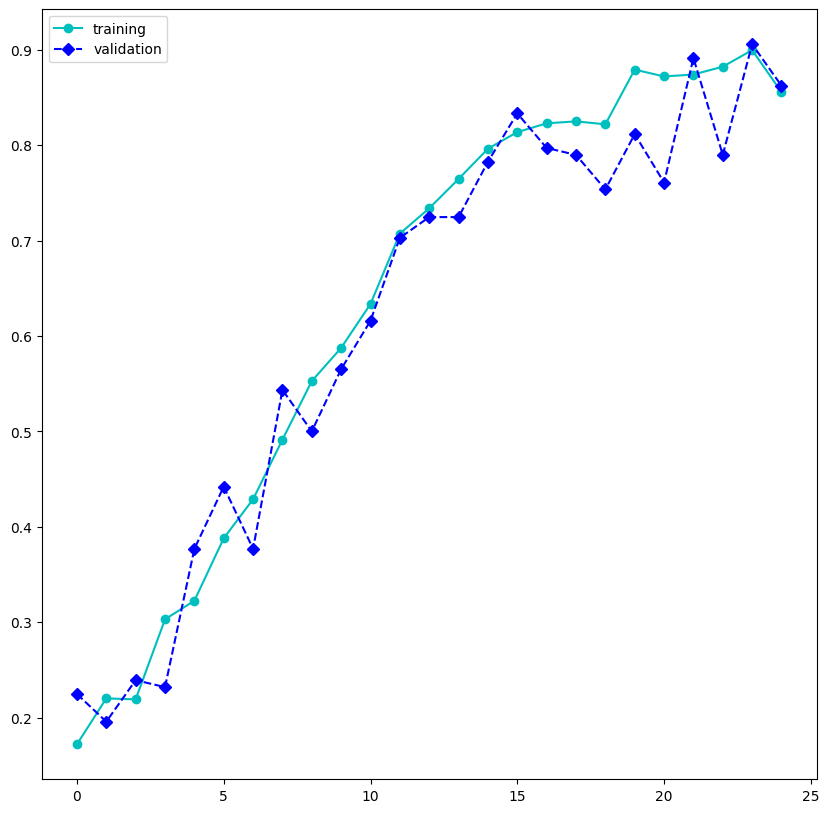

In [27]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history.history['accuracy'])), 
         history.history['accuracy'],
         'co-',
         label='training')
plt.plot(range(len(history.history['val_accuracy'])), 
         history.history['val_accuracy'],
         'bD--',
         label='validation')
plt.legend()
plt.show()

#### Visualisasi Loss Training dan Validation

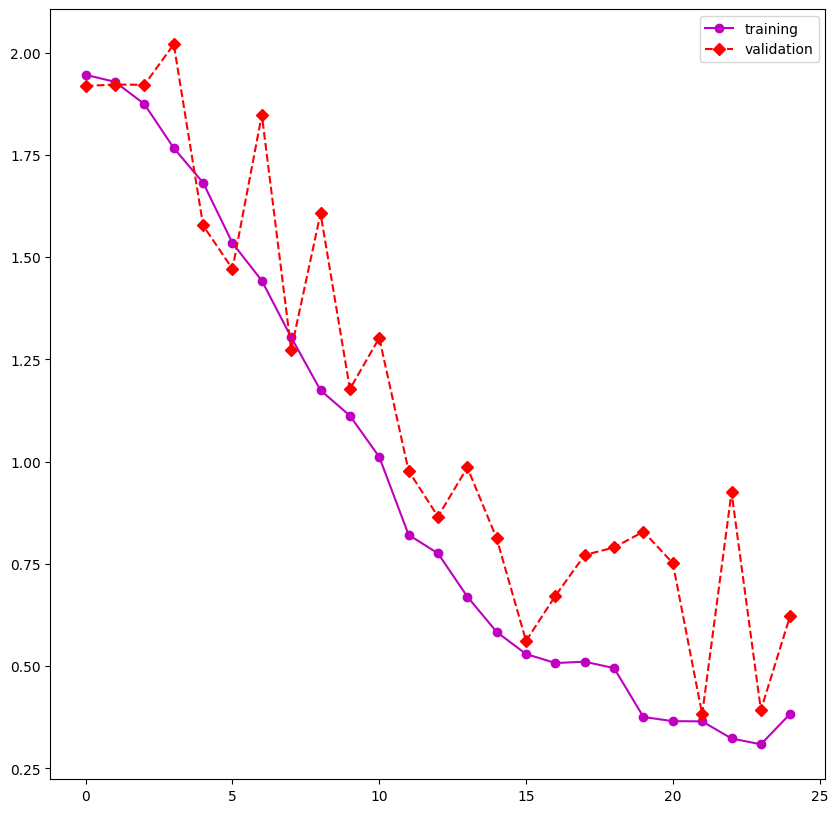

In [28]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history.history['loss'])), 
         history.history['loss'],
         'mo-',
         label='training')
plt.plot(range(len(history.history['val_loss'])), 
         history.history['val_loss'],
         'rD--',
         label='validation')
plt.legend()
plt.show()

#### Visualisasi Akurasi dan Loss, Pada Training dan Validation menggunakan sub plot

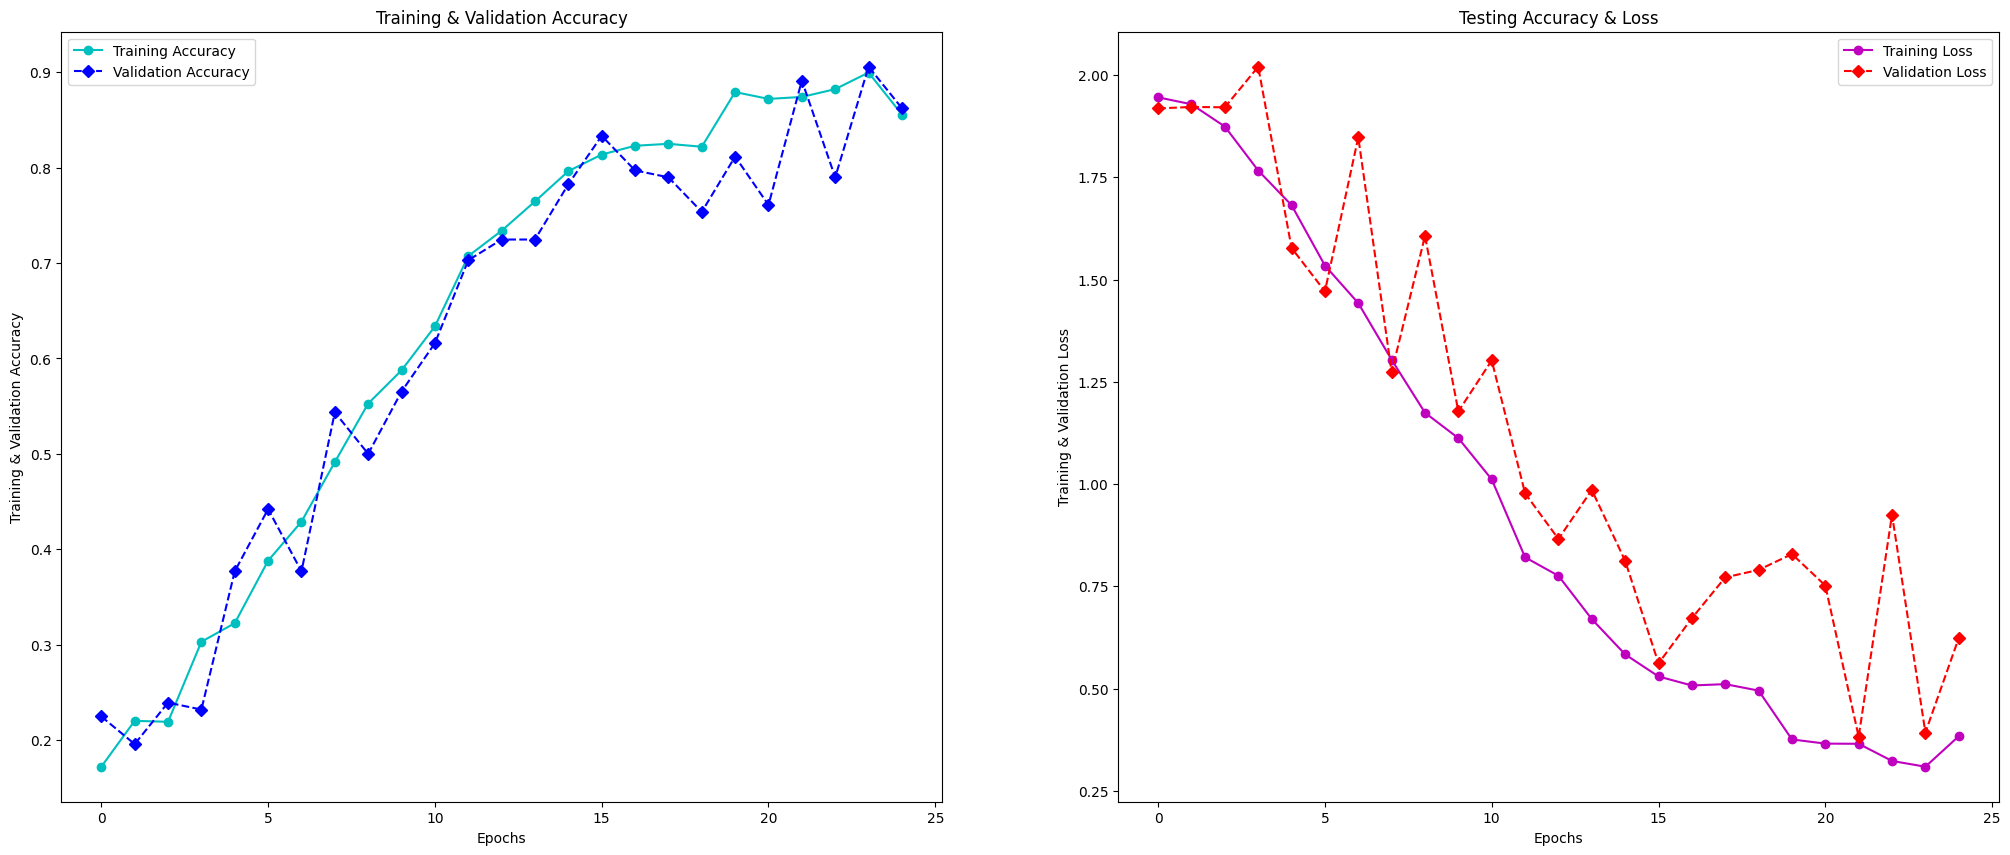

In [29]:
epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(25,10)

ax[0].plot(epochs , train_acc , 'co-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'bD--' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Training & Validation Accuracy")

ax[1].plot(epochs , train_loss , 'mo-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'rD--' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

### Save Model diatas

In [30]:
model.save('/Semester 5/Praktikum/Kecerdasan Buatan/PA_KB_FINAL/Save Model')
model.save('/Semester 5/Praktikum/Kecerdasan Buatan/PA_KB_FINAL/Save Model.h5')

INFO:tensorflow:Assets written to: /Semester 5/Praktikum/Kecerdasan Buatan/PA_KB_FINAL/Save Model\assets


INFO:tensorflow:Assets written to: /Semester 5/Praktikum/Kecerdasan Buatan/PA_KB_FINAL/Save Model\assets


# Evaluate

#### untuk menguji Hasil dari Training menggunakan Evaluate

In [31]:
test_evaluate = model.evaluate(test_generator, verbose=0)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}') #dibulatkan 2 artinya 2 angka di belakang koma

Test loss     : 0.5427027344703674
Test accuracy : 0.83


# Preview Hasil Prediksi

#### Visualisasi Hasil dari Prediksi yang benar

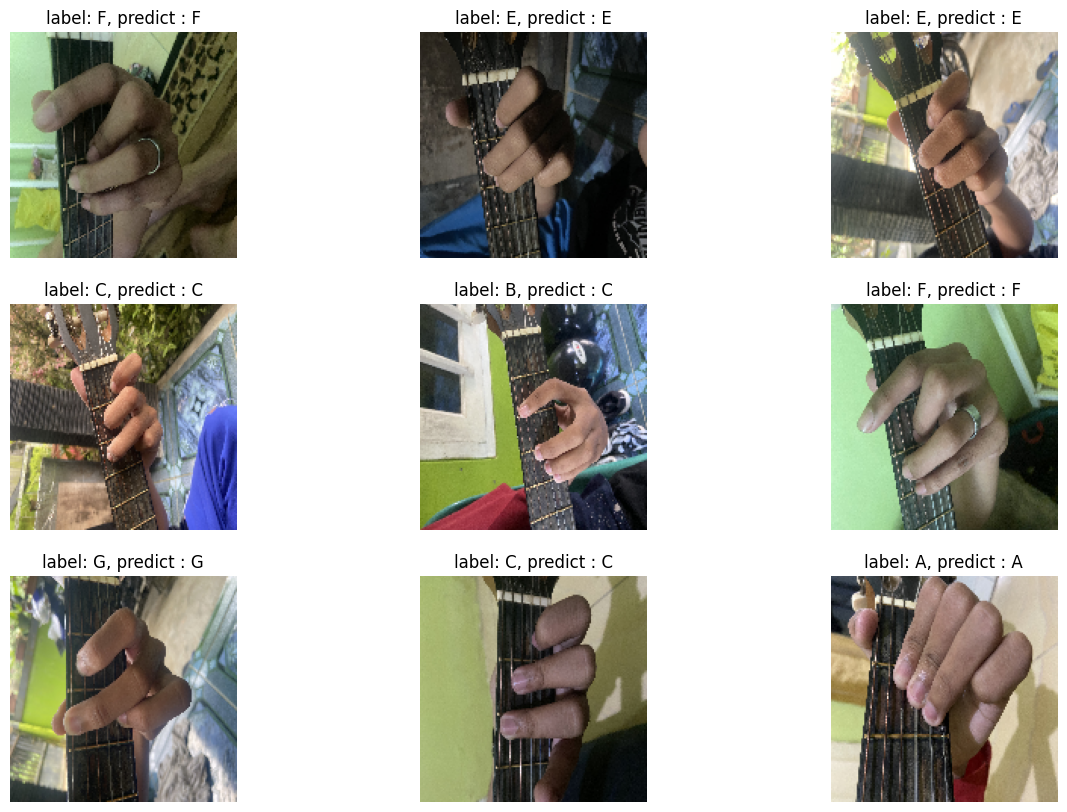

In [33]:
image ,label = next(iter(test_generator))

plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_name[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}, predict : {class_name[y_pred]}')

# Prediksi Error

#### Visualisasi Hasil dari Prediksi yang salah

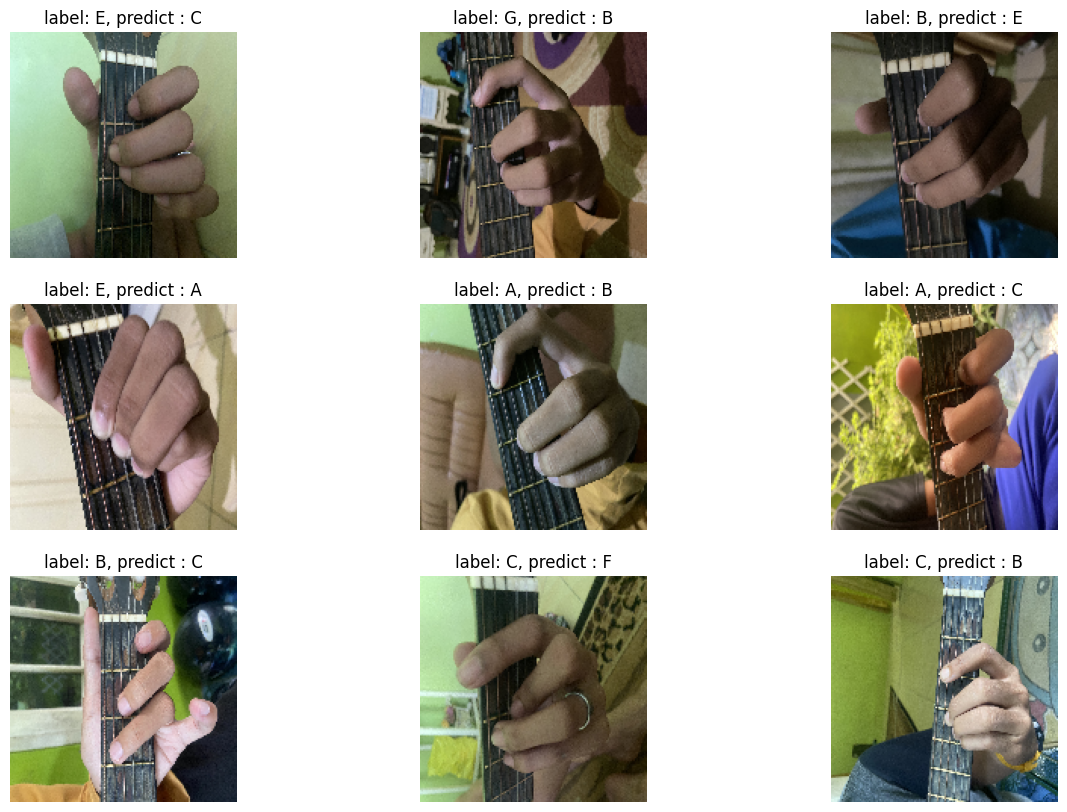

In [58]:
#Plot prediction Error
image ,label = next(iter(test_generator))

plt.figure(figsize=(15,10))

i,j = 0,0
while (j < 9):
    TrueLabel = class_name[np.argmax(label[j])]
    plt.subplot(3,3,j+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    if (TrueLabel != class_name[y_pred]):
        plt.imshow(tf.squeeze(image[i]))
        plt.title(f'label: {TrueLabel}, predict : {class_name[y_pred]}')
        j+=1
    i+=1

# Classification report dan Confusin Matrix

In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [72]:
y_pred = model.predict(test_generator)

9/9 [==============================] - 23s 3s/step


In [69]:
y_pred

array([[2.17677304e-03, 1.61915739e-06, 4.35129832e-03, 5.18820889e-04,
        9.74336982e-01, 8.41790531e-03, 1.01965657e-02],
       [2.44854018e-03, 8.05163950e-07, 9.53839990e-05, 4.61397758e-05,
        9.51871753e-01, 2.85856593e-02, 1.69516485e-02],
       [3.47564200e-11, 4.14717080e-11, 1.81783946e-11, 1.00000000e+00,
        8.72065620e-09, 6.17526030e-11, 3.65683733e-11],
       [2.52630416e-04, 2.87727249e-04, 1.16759174e-01, 3.80643265e-04,
        3.33934158e-01, 5.00305831e-01, 4.80797663e-02],
       [1.33410699e-10, 1.21944089e-12, 2.96985438e-14, 1.00000000e+00,
        1.54597187e-13, 3.55171975e-10, 4.37103119e-14],
       [7.88318246e-08, 1.06992252e-06, 4.27092600e-05, 9.99756277e-01,
        1.56120757e-06, 4.72242573e-06, 1.93555286e-04],
       [1.20074060e-02, 3.52747129e-08, 3.74948081e-06, 1.53588394e-06,
        1.78189541e-03, 2.55218438e-05, 9.86179888e-01],
       [9.99900103e-01, 7.45137063e-10, 1.17953911e-12, 3.52277034e-08,
        1.66310781e-06, 1

In [70]:
y_predict = np.argmax(y_pred, axis=1)

In [71]:
print(classification_report(test_generator.labels, y_predict, target_names = class_name))

              precision    recall  f1-score   support

           A       0.14      0.15      0.14        20
           B       0.15      0.10      0.12        20
           C       0.17      0.15      0.16        20
           D       0.15      0.20      0.17        20
           E       0.10      0.10      0.10        20
           F       0.05      0.05      0.05        20
           G       0.26      0.28      0.27        18

    accuracy                           0.14       138
   macro avg       0.15      0.15      0.14       138
weighted avg       0.14      0.14      0.14       138



# Confusion Matrix

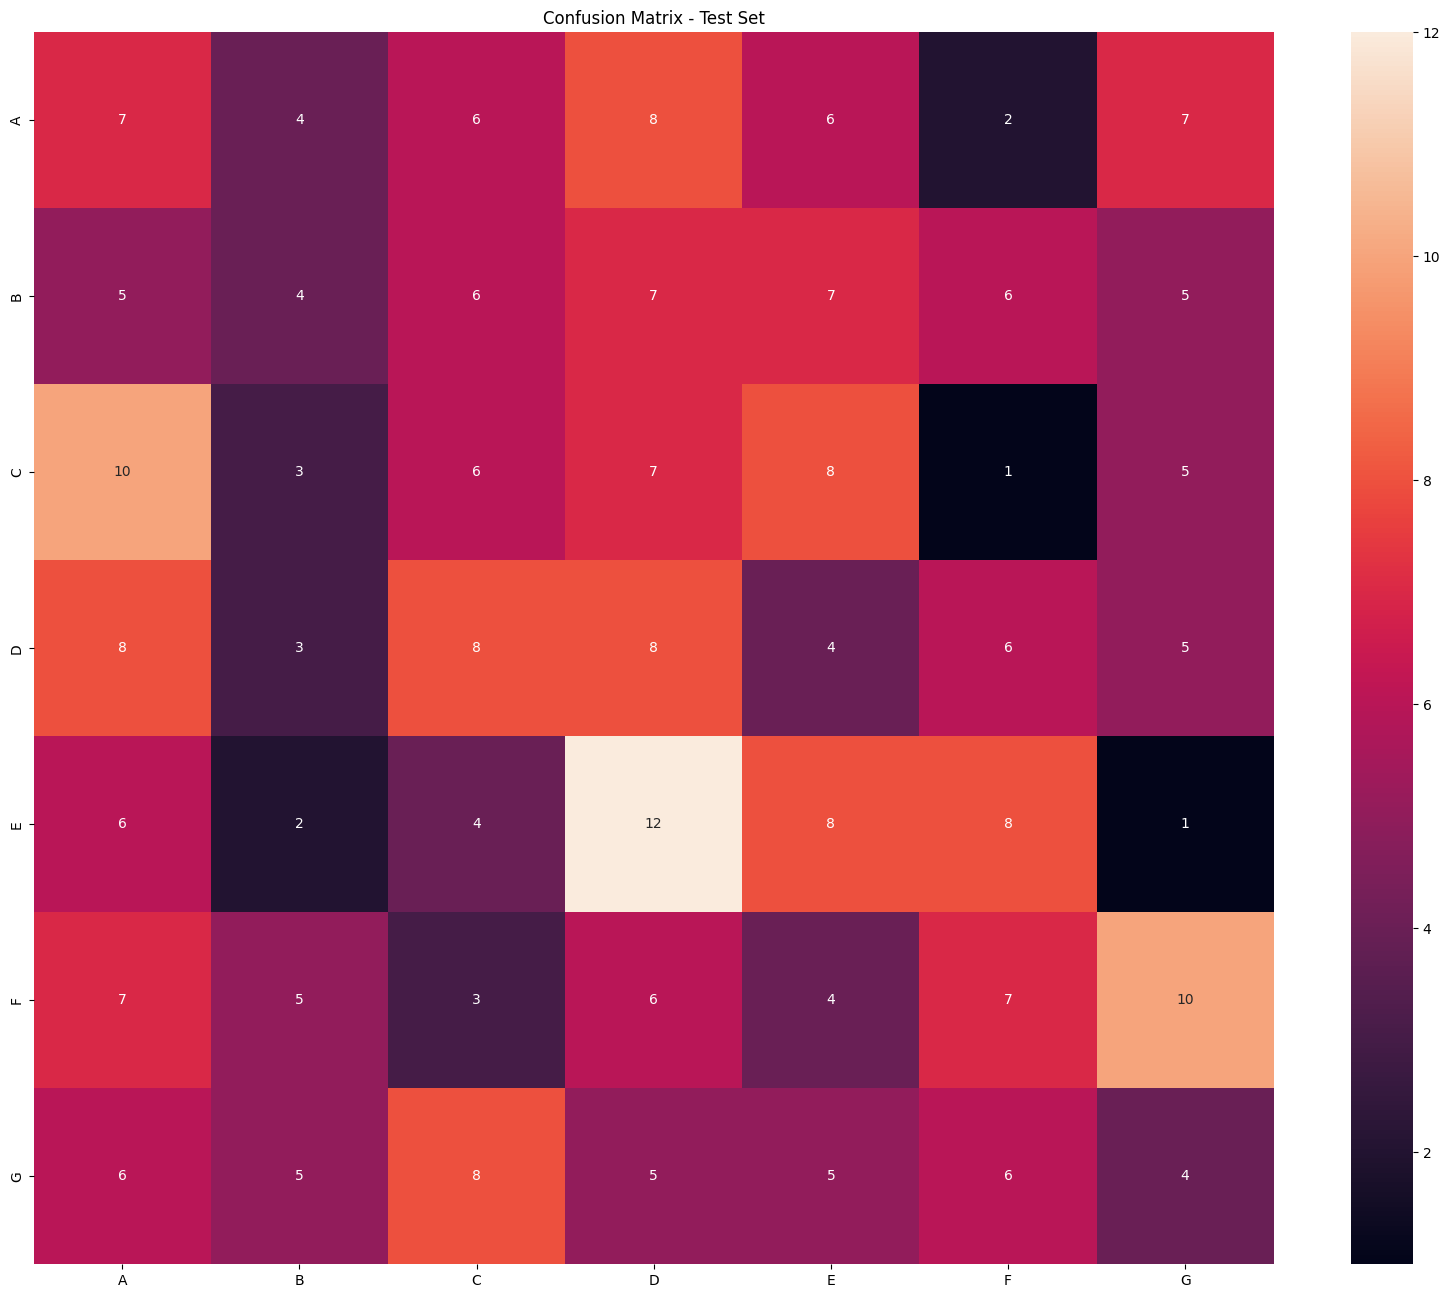

In [64]:
plt.figure(figsize=(20, 16))
cm = confusion_matrix(test_generator.labels, y_predict)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_name,yticklabels=class_name)
plt.title("Confusion Matrix - Test Set")
plt.show()

## Membuat Prediksi dengan Cara
- Mengupload Gambar
- dan melihat gambar itu termasuk dari kunci apa

In [ ]:
#  upload = files.upload() buat pas make google colab

In [65]:
# from google.colab import files
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np

1/1 [==============================] - 0s 32ms/step
E:/Semester 5/Praktikum/Kecerdasan Buatan/PA/Data foto/F/IMG_1138.jpeg
F


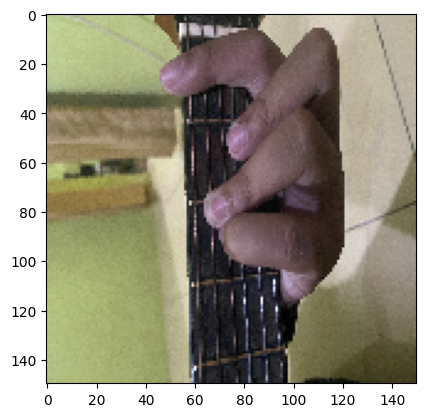

In [66]:
filename = askopenfilename()
img = tf.keras.utils.load_img(filename, target_size=(150, 150))
imgplot = plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)


image = np.vstack([x])
classes = model.predict(image, batch_size=32)

print(filename)
if classes[0][0] == 1:
  print('A')
elif classes[0][1] == 1:
  print('B')
elif classes[0][2] == 1:
  print('C')
elif classes[0][3] == 1:
  print('D')
elif classes[0][4] == 1:
  print('E')
elif classes[0][5] == 1:
  print('F')
else:
  print('G')